# Network Analysis

In [1]:
import os
import json

import numpy as np
import powerlaw

import networkx as nx

import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
FONTSIZE=16
LABELSIZE=0.9*FONTSIZE
LINEWIDTH=2.0
FIGWIDTH=8
ASPECT_RATIO=4/3

plt.rcParams['axes.labelsize'] = FONTSIZE
plt.rcParams['axes.linewidth'] = LINEWIDTH
plt.rcParams['axes.titlesize'] = 1.1*FONTSIZE
plt.rcParams['figure.figsize'] = [FIGWIDTH, FIGWIDTH/ASPECT_RATIO]
plt.rcParams['figure.labelsize'] = FONTSIZE
plt.rcParams['figure.titlesize'] = 1.1*FONTSIZE
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.fontsize'] = LABELSIZE
plt.rcParams['legend.title_fontsize'] = LABELSIZE
plt.rcParams['patch.linewidth'] = LINEWIDTH
plt.rcParams['lines.linewidth'] = LINEWIDTH
plt.rcParams['xtick.labelsize'] = LABELSIZE
plt.rcParams['ytick.labelsize'] = LABELSIZE
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.autolayout'] = True

In [4]:
# Carica il network completo
full_graph_backbone = nx.read_gexf(os.path.join("..","data_collection","graph","full_network_backbone_opinion.gexf"))

In [5]:
# Estrae il grafico Undirected e Unweighted
real_graph = full_graph_backbone.to_undirected()

# Rimuovere l'attributo "weight" da tutti gli archi
for u, v in real_graph.edges():
    if 'weight' in real_graph[u][v]:  # Verifica se esiste il peso
        del real_graph[u][v]['weight']

In [53]:
# Il grafico non è più diretto
for G in [full_graph_backbone, real_graph]:
    print(f"E' diretto? {G.is_directed()}")

E' diretto? True
E' diretto? False


In [59]:
# Il grafico non ha più l'attributo peso
u = 'Sufficient-Cat-5399'
v = 'Hesfallenontheice'
for G in [full_graph_backbone, real_graph]:
    if G.has_edge(u, v):
        edge_data = G[u][v]  # Ottiene gli attributi dell'edge (come dizionario)
        print(f"Edge ({u}, {v}):")
        try: print(f"    Weight: {edge_data['weight']}\n")
        except KeyError: print("    L'attributo 'weight' non è presente")

Edge (Sufficient-Cat-5399, Hesfallenontheice):
    Weight: 2.0

Edge (Sufficient-Cat-5399, Hesfallenontheice):
    L'attributo 'weight' non è presente


In [54]:
print("Weigthed and Directed")
print(f"Nodi: {full_graph_backbone.number_of_nodes()}, Archi: {full_graph_backbone.number_of_edges()}")

print("\nUnweigthed and Undirected:")
print(f"Nodi: {real_graph.number_of_nodes()}, Archi: {real_graph.number_of_edges()}")

Weigthed and Directed
Nodi: 18941, Archi: 72726

Unweigthed and Undirected:
Nodi: 18941, Archi: 66214


Il **numero di archi diminuisce** perché, nel caso in cui due nodi sono collegati con un arco entrante ed uno uscente, questi due archi vengono collassati in un unico collegamento senza direzione.

### Caratteristiche grafico 

In [7]:
N = real_graph.number_of_nodes()
L = real_graph.number_of_edges()
L_max = N*(N-1)/2

In [14]:
p = L/L_max

if p > np.log(N)/N: print(f"p = {p} > log(N)/N = {np.log(N)/N}  =>  Connected")
elif p > 1/ N: print(f"p = {p} > 1/N = {1/N}  =>  Supercritical")
elif p == 1/ N: print(f"p = {p} = 1/N = {1/N}  =>  Critical")
elif p < 1/N: print(f"p = {p} < 1/N = {1/N}  =>  Subcritical")


p = 0.00036914495838714863 > 1/N = 5.279552293965472e-05  =>  Supercritical


In [14]:
print(f"Number of component: {nx.number_connected_components(real_graph)}")
size_principal_component = len(list(nx.connected_components(real_graph))[0])
print(f"Principal component: {size_principal_component/N * 100:.1f}% ({size_principal_component}/{N})")

Number of component: 216
Principal component: 97.6% (18485/18941)


In [60]:
print(f"Average degree: {sum(dict(real_graph.degree()).values())/float(len(real_graph))}")
print(f"Global clustering: {nx.average_clustering(real_graph)}")

# Tempo di coputazione elevato => Average shortest path: 4.659564546301864
#principal_component = nx.subgraph(real_graph, list(nx.connected_components(real_graph))[0])
#print(f"Average shortest path: {nx.average_shortest_path_length(principal_component)}")

Average degree: 6.991605511852595
Global clustering: 0.042378415673978265
Average shortest path: 4.659564546301864


## Creazione grafici sintetici

### Random graph

In [10]:
# Random graph (Erdos-Renyi graph)
random_graph = nx.erdos_renyi_graph(N, L/L_max)  # p = L/L_max

In [15]:
print(f"Number of component: {nx.number_connected_components(random_graph)}")
size_principal_component = len(list(nx.connected_components(random_graph))[0])
print(f"Principal component: {size_principal_component/N * 100:.1f}% ({size_principal_component}/{N})")

Number of component: 19
Principal component: 99.9% (18923/18941)


In [109]:
print(f"Average degree: {sum(dict(random_graph.degree()).values())/float(len(random_graph))}")
print(f"Global clustering: {nx.average_clustering(random_graph)}")
print(f"Density: {random_graph.number_of_edges()/L_max}")

Average degree: 7.025394646533974
Global clustering: 0.00042555112291786835
Density: 0.0003709289676100303


In [70]:
# Tempo di coputazione elevato => Average shortest path: 5.275517032982921
#principal_component = nx.subgraph(random_graph, list(nx.connected_components(random_graph))[0])
#print(f"Average shortest path: {nx.average_shortest_path_length(principal_component)}")

Average shortest path: 5.275517032982921


### Small world graph

In [22]:
# Valore arrotondato dell'average degree
k_mean = int(np.round(sum(dict(real_graph.degree()).values())/float(len(real_graph)),0))

# Visto che ws_graph prende k/2 valori a destra e k/2 valori a sinistra è meglio avere un valore pari
if k_mean%2 != 0: k_mean-=1

Per individuare il corretto valore di p bisognerebbe calcolare il coefficente di clustering e la lunghezza media dei cammini al variare di p. Lo scopo è avere valori simili al grafico reale, di solito questo significa **minimizzare la lunghezza dei cammini** e **massimizzare il coefficente di clustering**. Visto che i tempi di computazione della lunghezza media dei cammini sono molto elevati, mi limito a **variare il valore di p guardando solo il valore del coefficente di clustering** (verificando a posteriori se il valore della lunghezza media dei cammini è comparabile a quella reale)

In [67]:
# Small world (Watts-Strogatz graph)
p_ws = 0.59
small_world_graph = nx.watts_strogatz_graph(N, k_mean, p_ws)

In [20]:
print(f"Number of component: {nx.number_connected_components(small_world_graph)}")
size_principal_component = len(list(nx.connected_components(small_world_graph))[0])
print(f"Principal component: {size_principal_component/N * 100:.1f}% ({size_principal_component}/{N})")

Number of component: 1
Principal component: 100.0% (18941/18941)


In [108]:
print(f"Average degree: {sum(dict(small_world_graph.degree()).values())/float(len(small_world_graph))}")
print(f"Global clustering: {nx.average_clustering(small_world_graph)}")
print(f"Density: {small_world_graph.number_of_edges()/L_max}")

Average degree: 6.0
Global clustering: 0.04199372684405315
Density: 0.00031678986272439284


In [69]:
# Tempo di coputazione elevato => Average shortest path: 5.9885152009014595
#print(f"Average shortest path: {nx.average_shortest_path_length(small_world_graph)}")

Average shortest path: 5.9885152009014595


Average shortest path è maggiore di quello reale, per diminuirlo dovrei aumentare p, ma questo comporterebbe ad una diminuzione del coefficente di clustering. Inoltre l'average shortest path, che corrisponde al caso p=1, ha comunque un valore di 5.28, maggiore di quello reale. Di conseguenza viene accettato il valore di p=0.59

### Scale free graph

In [73]:
m = int(np.round(L/N,0)) # numero link che ogni nodo collega appena entra nel network

# Scale free graph (Barabasi-Albert graph)
scale_free_graph = nx.barabasi_albert_graph(N, m)

In [75]:
print(f"Number of component: {nx.number_connected_components(small_world_graph)}")
size_principal_component = len(list(nx.connected_components(small_world_graph))[0])
print(f"Principal component: {size_principal_component/N * 100:.1f}% ({size_principal_component}/{N})")

Number of component: 1
Principal component: 100.0% (18941/18941)


In [107]:
print(f"Average degree: {sum(dict(small_world_graph.degree()).values())/float(len(small_world_graph))}")
print(f"Global clustering: {nx.average_clustering(small_world_graph)}")
print(f"Density: {scale_free_graph.number_of_edges()/L_max}")

Average degree: 6.0
Global clustering: 0.04199372684405315
Density: 0.0003167396874649993


In [77]:
# Tempo di coputazione elevato => Average shortest path: 4.4926815816156065
#print(f"Average shortest path: {nx.average_shortest_path_length(scale_free_graph)}")

Average shortest path: 4.4926815816156065


## Degree Distribution

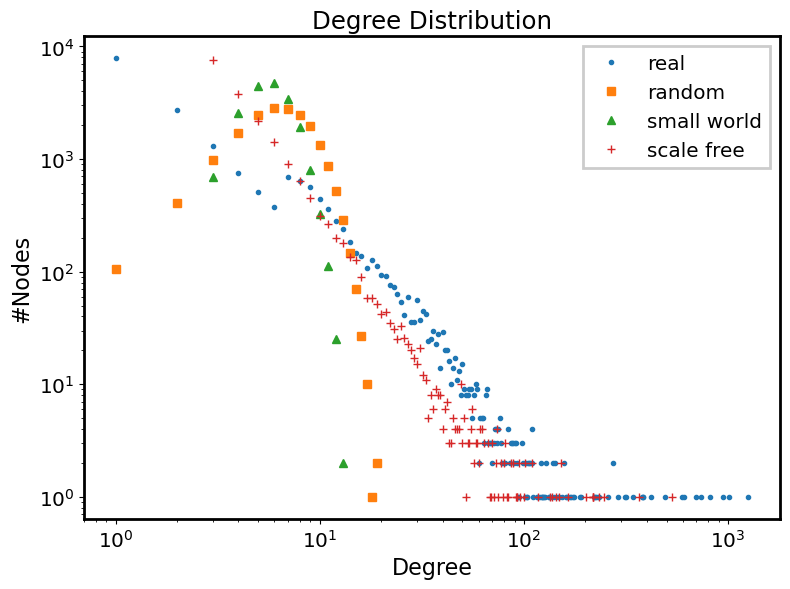

In [96]:
hist_real = nx.degree_histogram(real_graph)
hist_random = nx.degree_histogram(random_graph)
hist_small_world = nx.degree_histogram(small_world_graph)
hist_scale_free = nx.degree_histogram(scale_free_graph)

plt.plot(range(0, len(hist_real)), hist_real, ".", label='real')
plt.plot(range(0, len(hist_random)), hist_random, "s", alpha=1, label='random')
plt.plot(range(0, len(hist_small_world)), hist_small_world, "^", alpha=1, label='small world')
plt.plot(range(0, len(hist_scale_free)), hist_scale_free, "+", alpha=1, label='scale free')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.legend()
plt.savefig(os.path.join("plots", "Degree_Distribution"))
plt.show()

In [106]:
# Powerlaw fit
for G in [real_graph, scale_free_graph]:
    M = nx.to_scipy_sparse_array(G)
    #xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0) # Somma lungo le colonne
    degree = np.bincount(indegrees)
    
    fit = powerlaw.Fit(
        np.array(degree)+1, 
        fit_method='KS', 
        #xmin=xmin, 
        xmax=max(degree)-xmin,
        discrete=True
    )
    
    if G == real_graph: print("Real graph:")
    else: print("\nScale Free graph:")

    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}\n')
    

Calculating best minimal value for power law fit
Real graph:ss: 98%
alpha=2.3963866031712127 sigma=0.2802876550738655

Calculating best minimal value for power law fit
xmin progress: 97%
Scale Free graph:
alpha=2.3336079131625738 sigma=0.23589641765474878



Nel caso in cui viene inizializzato xmin il valore di alpha è $4.03 \pm 0.06$ che non è compatibile con il valore del grafico scale free ($2.55 \pm 0.07$). Questo è dovuto ad un salto per basso degree nella distribuzione del grafico reale, per evitare che questo influisca sul valore di alpha è necessario escluderlo dai parametri iniziali e lasciare che venga calcolato dall'algoritmo.
Senza xmin come valore iniziale è possibile notare che i due alpha sono compatibili:

- $\alpha_{real} = 2.40 \pm 0.28$
- $\alpha_{sf} = 2.33 \pm 0.24$

## Centarlity

In [111]:
graphs_name = ["Real graph", "Random graph", "Small world graph", "Scale free graph"]
graphs = [real_graph, random_graph, small_world_graph, scale_free_graph]

### Degree centarlity

Rappresenta il numero di vicini di ogni nodo

La distribuzione corrisponde alla degree distribution della sezione precedente

In [114]:
for G, label in zip(graphs, graphs_name):
    degrees = dict(G.degree())
    ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
    print(f"Degree centarlity ({label}):\n {ranks[0:5]}\n")

Degree centarlity (Real graph):
 [('intelligentreviews', 1257), ('f1sh98', 1010), ('PotatoUmaru', 945), ('nimobo', 818), ('Ask4MD', 734)]

Degree centarlity (Random graph):
 [(1422, 19), (18672, 19), (15593, 18), (1361, 17), (1483, 17)]

Degree centarlity (Small world graph):
 [(8864, 13), (15859, 13), (398, 12), (925, 12), (1271, 12)]

Degree centarlity (Scale free graph):
 [(0, 530), (4, 367), (5, 248), (7, 233), (3, 219)]



Nel caso di random graph e small world graph non ci sono hubs, essendo la distribuzione poassoniana. Invece nel caso di scale free, essendo una powerlaw, si possono individuare gli hubs; però rimangono molto più piccoli di quelli reali. Pur essendo i valori di alpha compatibili il grafico reale si discosta dalla powerlaw nei valori iniziali e finali.

In [13]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","degree_centrality.json"), "r") as f:
        degree = json.load(f)
else:
    degree = dict(real_graph.degree())

In [7]:
ranks = [(k, v) for k, v in sorted(degree.items(), key=lambda item: -item[1])]
print(f"Degree centarlity (Real graph):\n {ranks[0:5]}\n")

Degree centarlity (Real graph):
 [('intelligentreviews', 1257), ('f1sh98', 1010), ('PotatoUmaru', 945), ('nimobo', 818), ('Ask4MD', 734)]



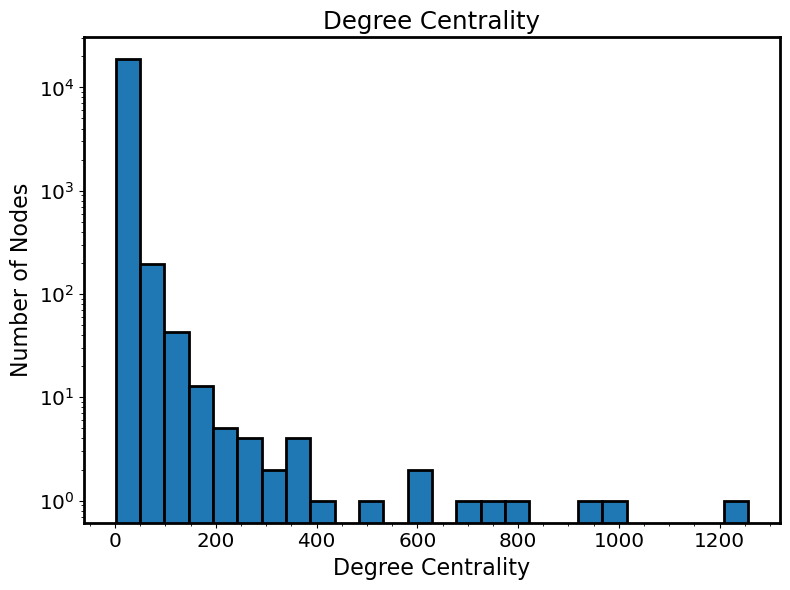

In [14]:
plt.hist(degree.values(), bins = 'doane', edgecolor='black', log=True)
plt.title('Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "Degree_Centrality"))
plt.show()

In [12]:
# Salva su json
with open(os.path.join("centrality","degree_centrality.json"), "w") as f:
    json.dump(degree, f, indent=4)

### Closeness

Valore inverso della media degli shortest paths da un nodo a tutti gli altri. Maggiore è la closeness, più sara facile raggiungere il nodo preso un secondo nodo a caso. Il valore viene normalizzato tra 0 e 1.

In [15]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","closeness_centrality.json"), "r") as f:
        closeness = json.load(f)
else:
    closeness = nx.closeness_centrality(real_graph)

In [169]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
print(f"Closness centarlity (Real graph):\n {ranks[0:5]}\n")

Closness centarlity (Real graph):
 [('f1sh98', 0.32904034200030235), ('intelligentreviews', 0.32425544056446964), ('Arachnohybrid', 0.3137431937783946), ('Ask4MD', 0.310807882104836), ('PotatoUmaru', 0.3072608743034726)]



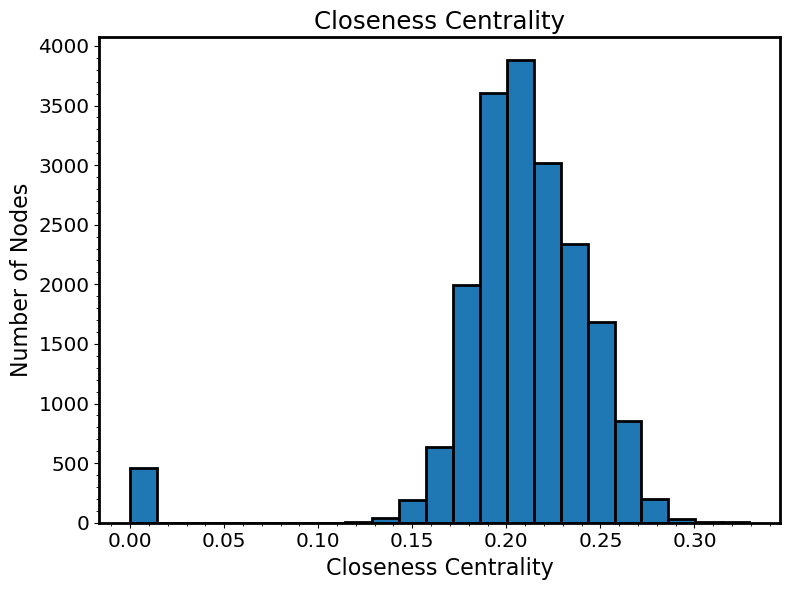

In [16]:
plt.hist(closeness.values(), bins = 'doane', edgecolor='black')
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "Closeness_Centrality"))
plt.show()

Il picco vicino a 0 è dovuto ai nodi scollegati dalla componente principale (infatti se sottraiamo il numero di nodi della componente principale al numero di nodi totale otteniamo: 18941 - 18485 = 456, che corrisponde all'altezza del picco). Se escludiamo quest'ultimo picco, il valore centrale corrisponde all'inverso dello shortest path della componente principale ($1/4,66 \approx 0.21$).

Questa distribuzione implica che i nodi della componente principale sono equidistanti tra loro, visto che tutti i valori sono vicini al valore medio.

In [171]:
# Salva su json
with open(os.path.join("centrality","closeness_centrality.json"), "w") as f:
    json.dump(closeness, f, indent=4)

### Harmonic centrality

In [17]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","harmonic_centrality.json"), "r") as f:
        harmonic = json.load(f)
else:
    harmonic = nx.harmonic_centrality(real_graph)

In [173]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
print(f"Harmonic centarlity (Real graph):\n {ranks[0:5]}\n")

Harmonic centarlity (Real graph):
 [('intelligentreviews', 7224.04047618941), ('f1sh98', 7180.452380951413), ('PotatoUmaru', 6851.899999999014), ('Arachnohybrid', 6789.142857141905), ('Ask4MD', 6776.666666665626)]



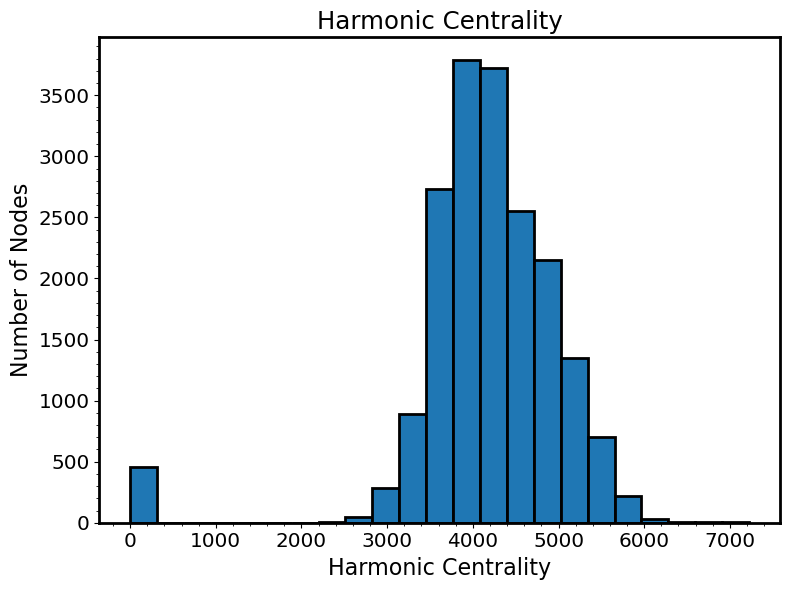

In [18]:
plt.hist(harmonic.values(), bins = 'doane', edgecolor='black', log=False)
plt.title('Harmonic Centrality')
plt.xlabel('Harmonic Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "Harmonic_Centrality"))
plt.show()

In [175]:
# Salva su json
with open(os.path.join("centrality","harmonic_centrality.json"), "w") as f:
    json.dump(harmonic, f, indent=4)

### Betweenness centrality

In [19]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","betweenness_centrality.json"), "r") as f:
        betweenness = json.load(f)
else:
    betweenness = nx.betweenness_centrality(real_graph)

In [123]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
print(f"Betweenness centarlity (Real graph):\n {ranks[0:5]}\n")

Betweenness centarlity (Real graph):
 [('f1sh98', 0.11165715190946444), ('intelligentreviews', 0.10317940457556102), ('progress18', 0.07646852860942237), ('PotatoUmaru', 0.06587272606094495), ('Arachnohybrid', 0.05618101508150021)]



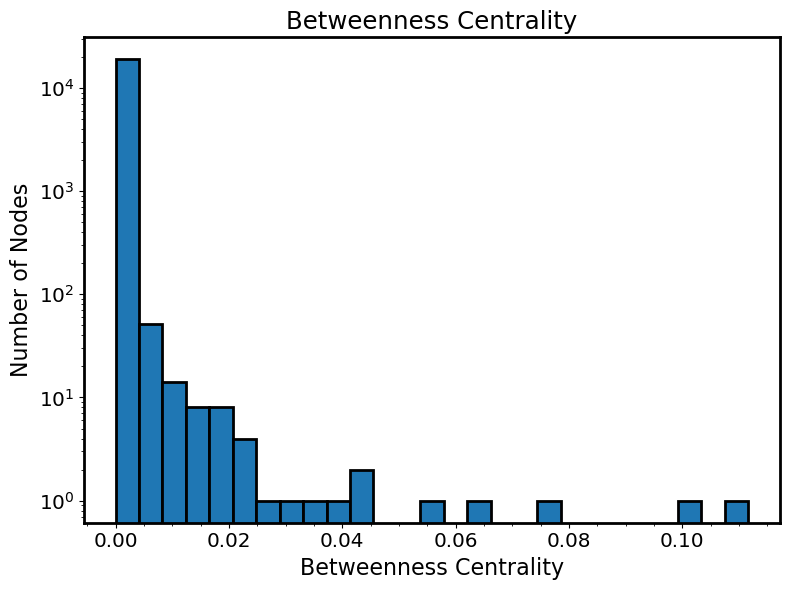

In [20]:
plt.hist(betweenness.values(), bins = 'doane', edgecolor='black', log=True)
plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "Betweenness_Centrality"))
plt.show()

Ci sono pochi nodi che controllano il passaggio di informazioni, probabilmente dovuto alle persone più aperte al dialogo. L'andamento è atteso visto che i dati sono presi da subreddit con idee opposte; infatti nel notebook data collection si era calcolata la homophily con un valore di 0.7-0.8 (aumenta nel tempo), che indica community divise con poche interazioni tra di loro (**echo chambers**<sup>1</sup>).

<sup>1</sup> In questo caso non è del tutto corretto utilizzare questo termine, perché questo fenomeno è creato artificialmente estraendo solo dati da subreddit opposti.

In [140]:
# Salva su json
with open(os.path.join("centrality","betweenness_centrality.json"), "w") as f:
    json.dump(betweenness, f, indent=4)

### Eigenvector centrality

In [21]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","eigenvector_centrality.json"), "r") as f:
        eigenvector = json.load(f)
else:
    eigenvector = nx.eigenvector_centrality(real_graph)

In [146]:
ranks = [(k, v) for k, v in sorted(eigenvector.items(), key=lambda item: -item[1])]
print(f"Eigenvector centarlity (Real graph):\n {ranks[0:5]}\n")

Eigenvector centarlity (Real graph):
 [('intelligentreviews', 0.2944349669049785), ('f1sh98', 0.2318100746738033), ('nimobo', 0.2103068275168922), ('Ask4MD', 0.20001820607914614), ('PotatoUmaru', 0.18149332597564474)]



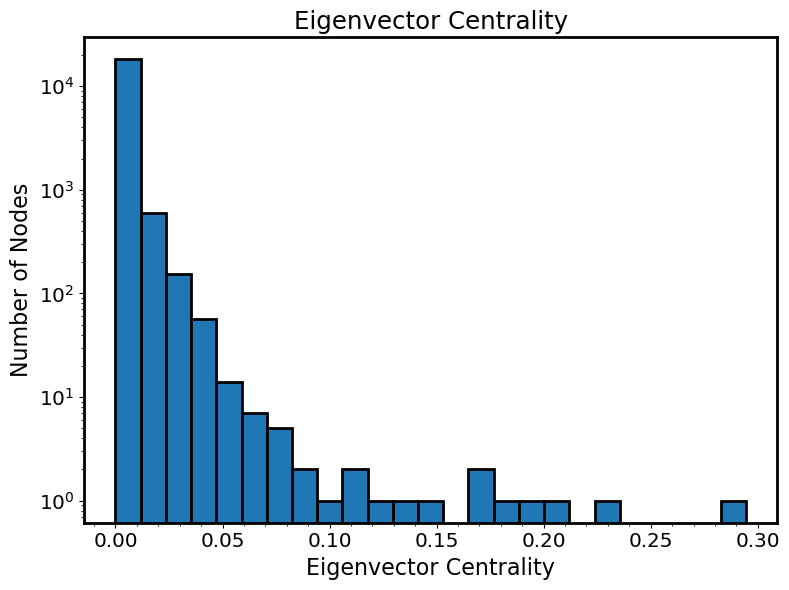

In [22]:
plt.hist(eigenvector.values(), bins = 'doane', edgecolor='black', log=True)
plt.title('Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "Eigenvector_Centrality"))
plt.show()

L'**eigenvector centrality** misura l'importanza di un nodo in base alla centralità dei suoi vicini. Anche la maggior parte dei nodi ha valori molto bassi, questo implica che la maggior parte dei nodi è collegata a nodi poco influenti. Ci sono alcuni nodi con centralità molto maggiore, probabilmente questi nodi corrispondono a utenti molto attivi o post virali, che ricevono molte interazioni da altri utenti altrettanto centrali.

In [148]:
# Salva su json
with open(os.path.join("centrality","eigenvector_centrality.json"), "w") as f:
    json.dump(eigenvector, f, indent=4)

### PageRank centrality

In [23]:
LOAD = True # Per saltare i tempi di computazione elevati

if LOAD:
    with open(os.path.join("centrality","pagerank_centrality.json"), "r") as f:
        pagerank = json.load(f)
else:
    pagerank = nx.pagerank(real_graph)

In [179]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
print(f"PageRank centarlity (Real graph):\n {ranks[0:5]}\n")

PageRank centarlity (Real graph):
 [('intelligentreviews', 0.0074544831236542245), ('PotatoUmaru', 0.006559175833685634), ('f1sh98', 0.006127566052885221), ('nimobo', 0.004671731209593951), ('Arachnohybrid', 0.004391194564055438)]



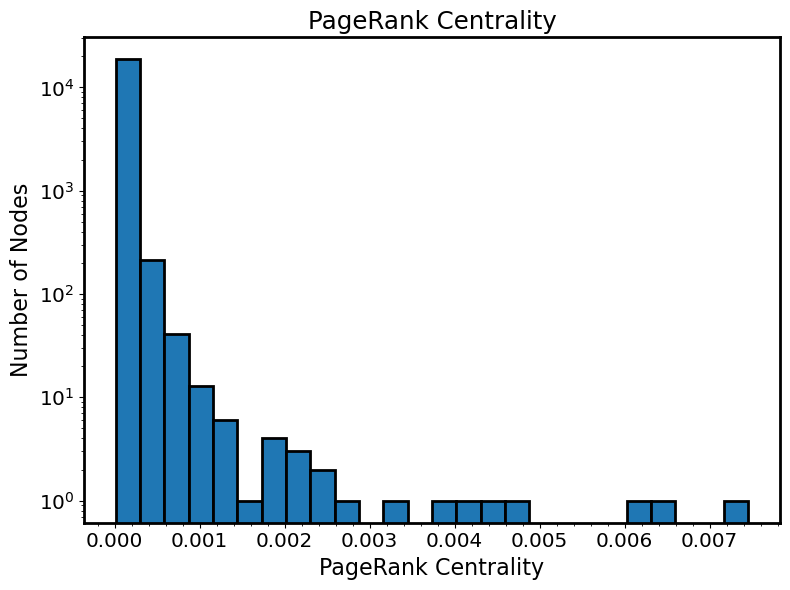

In [24]:
plt.hist(pagerank.values(), bins = 'doane', edgecolor='black', log=True)
plt.title('PageRank Centrality')
plt.xlabel('PageRank Centrality')
plt.ylabel('Number of Nodes')
plt.savefig(os.path.join("plots", "PageRank_Centrality"))
plt.show()

In [181]:
# Salva su json
with open(os.path.join("centrality","pagerank_centrality.json"), "w") as f:
    json.dump(pagerank, f, indent=4)

### All Centrality plot

In [8]:
LOAD = True # Per evitare di caricare le celle sopra

centrality_name = ['Degree', 'Closeness', 'Harmonic', 'Betweenness', 'Eigenvector', 'Pagerank']
if LOAD:
    centrality = []
    for cent in centrality_name:
        cent = cent.lower()
        with open(os.path.join("centrality",f"{cent}_centrality.json"), "r") as f:
            centrality.append(json.load(f))
else:
    centrality = [degree, closeness, harmonic, betweenness, eigenvector, pagerank]

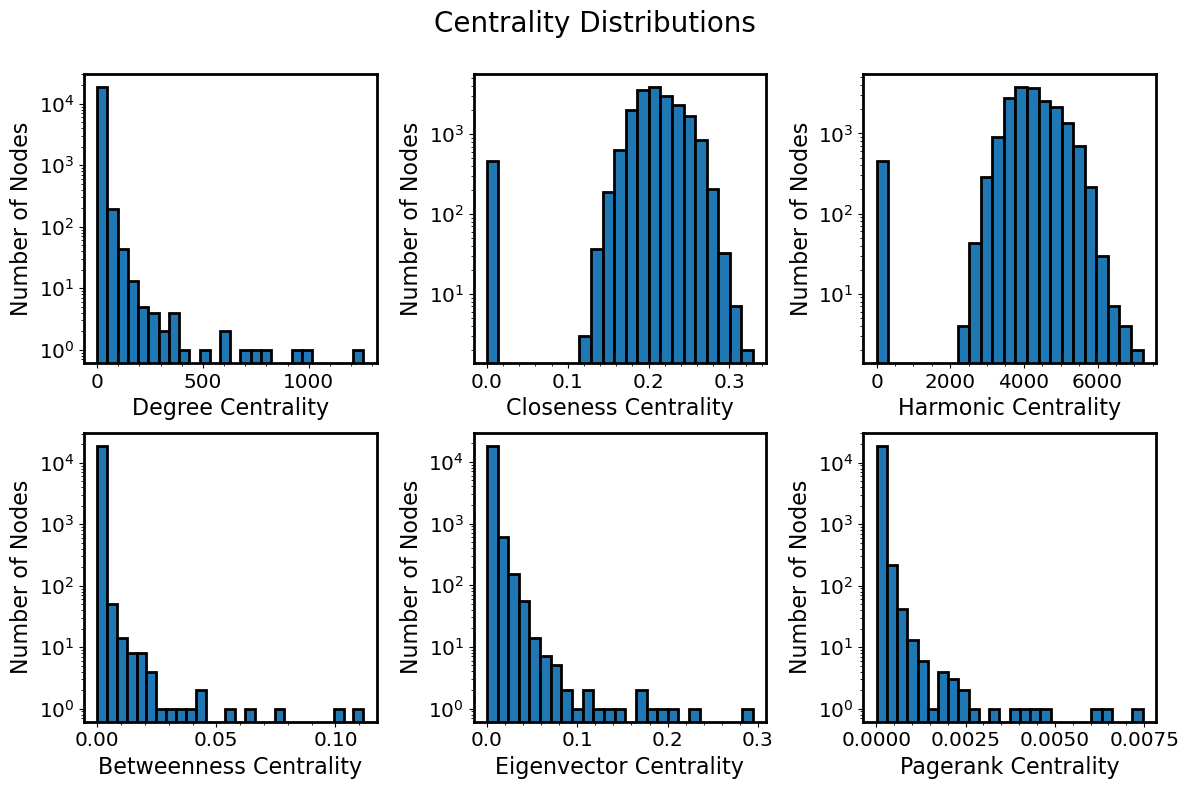

In [11]:
# Crea una figura con 2 righe e 3 colonne di sottotrame
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()  # Converte la matrice 2x3 in un array per un facile accesso

for i in range(6):
    
    # Disegnare il grafico nella cella corrispondente
    ax = axes[i]
    #if centrality_name[i] == 'Closeness' or centrality_name[i] == 'Harmonic': log = False
    #else: log = True
    ax.hist(centrality[i].values(), bins = 'doane', edgecolor='black', log=True)
    #ax.set_title(f'{centrality_name[i]} Centrality')
    ax.set_xlabel(f'{centrality_name[i]} Centrality')
    ax.set_ylabel('Number of Nodes')

# Aggiungere un titolo alla figura
fig.suptitle("Centrality Distributions", fontsize=20)

# Regolare gli spazi tra i grafici
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Lascia spazio per il titolo principale

# Salva l'immagine in un file
plt.savefig(os.path.join("plots", "Centrality.png"))
plt.show()